In [1]:
from visualizer import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# Load the benchmark result files
df_128 = pd.read_csv("visualize_results/128.csv")
df_256 = pd.read_csv("visualize_results/256.csv")
df_512 = pd.read_csv("visualize_results/512.csv")

# Add dimension column to differentiate datasets
df_128["dimension"] = 128
df_256["dimension"] = 256
df_512["dimension"] = 512

# Merge all datasets into a single DataFrame
df_all = pd.concat([df_128, df_256, df_512], ignore_index=True)

# Extract dataset size and indexing type from the table_name column
df_all["dataset_size"] = df_all["table_name"].apply(lambda x: "500K" if "500K" in x else "1M" if "1M" in x else "5M")
df_all["indexing_type"] = df_all["table_name"].apply(lambda x: "No Index" if "no_index" in x else ("IVFFlat" if "ivfflat" in x else "HNSW"))

# Convert dataset_size to numeric for proper ordering
df_all["dataset_size"] = df_all["dataset_size"].map({"500K": 500000, "1M": 1000000, "5M": 5000000})

# Calculate throughput manually to ensure correctness
df_all["calculated_throughput"] = df_all["num_queries"] / df_all["elapsed_time"]

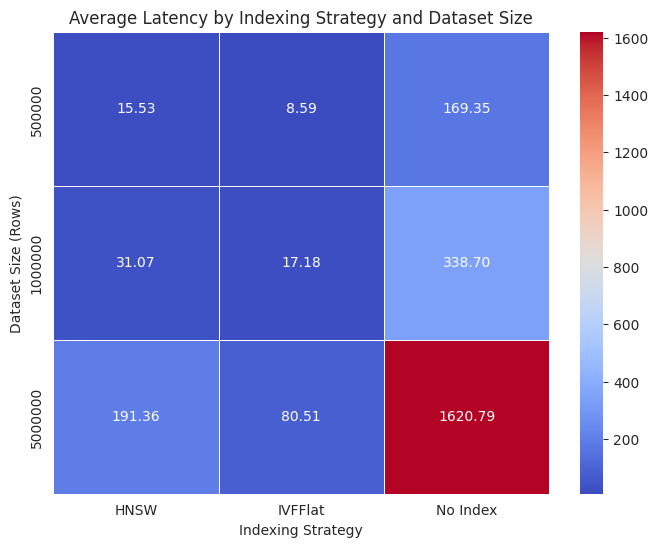

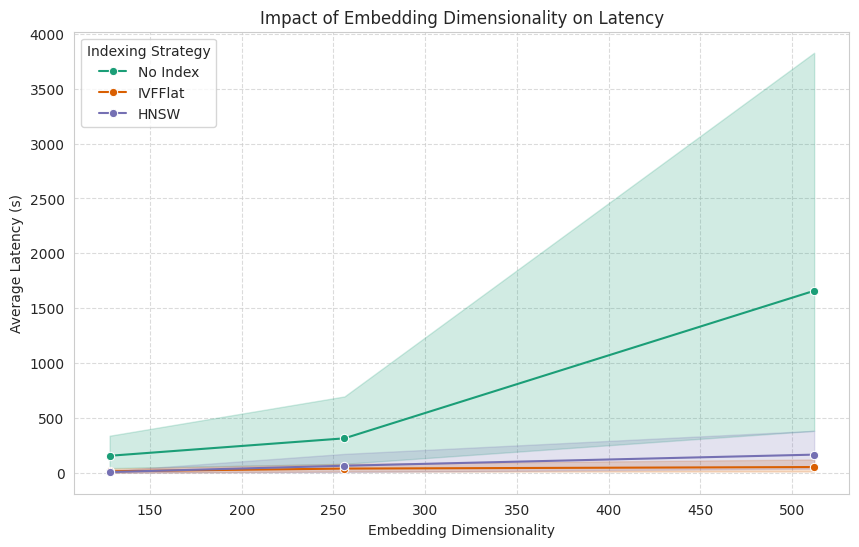

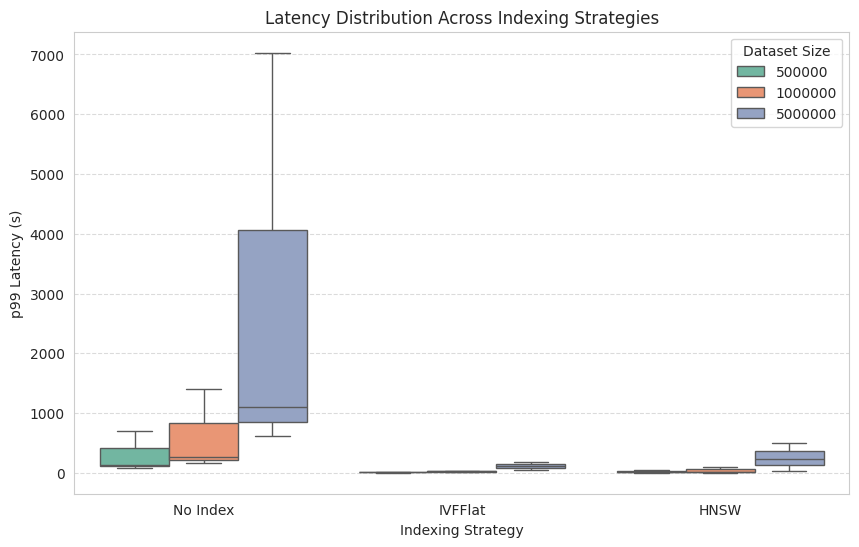

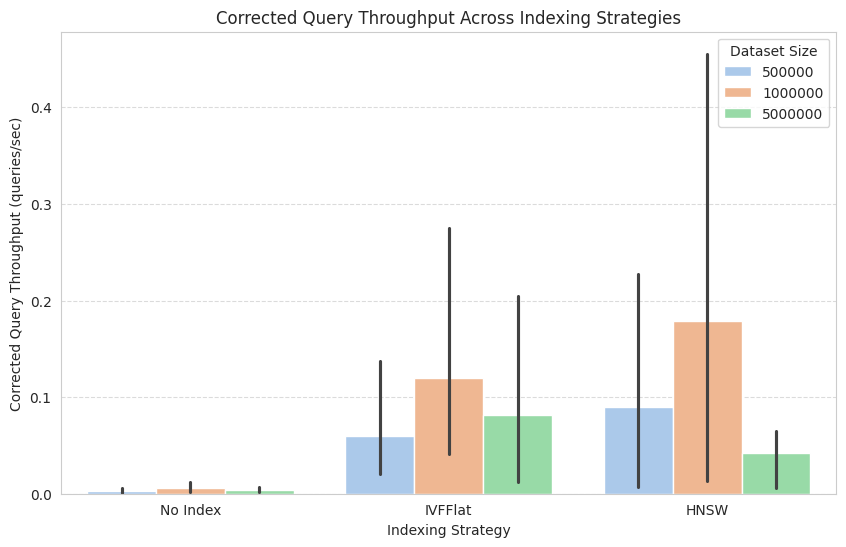

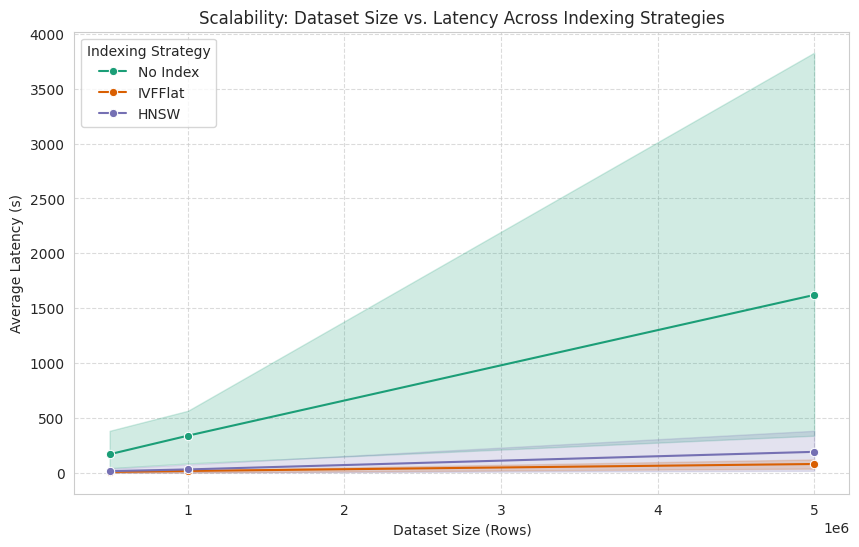

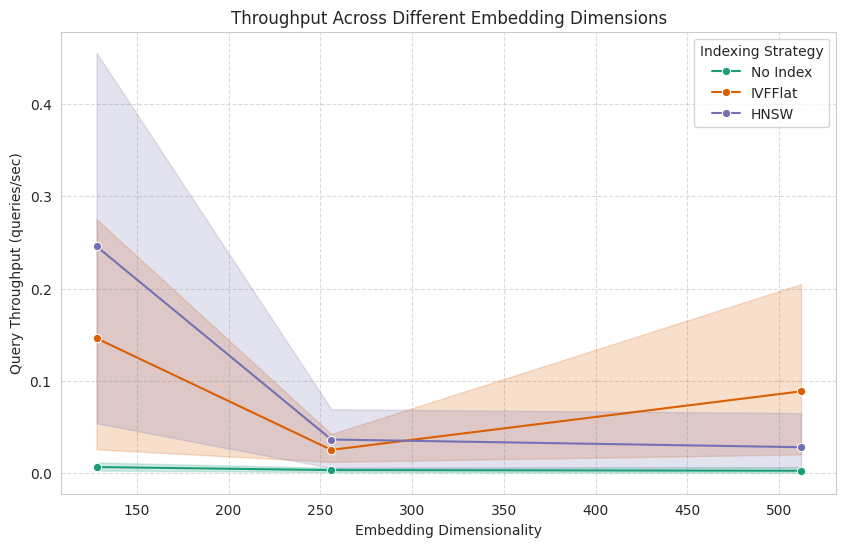

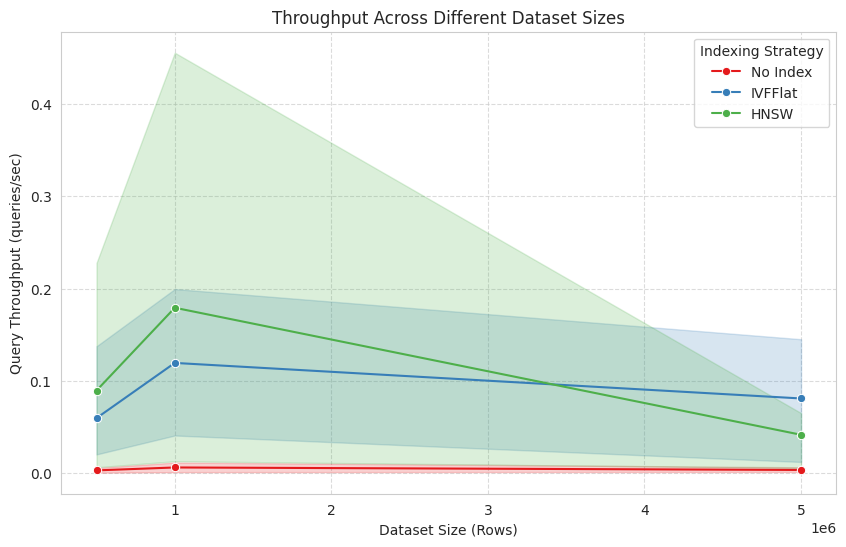

In [3]:
plot_latency_heatmap(df_all)
plot_latency_vs_dimension(df_all)
plot_latency_distribution(df_all)
plot_throughput_vs_indexing(df_all)
plot_scalability(df_all)
plot_throughput_vs_dimension(df_all)
plot_throughput_vs_dataset_size(df_all)

In [4]:
df_all

,table_name,num_queries,num_clients,avg_latency,min_latency,max_latency,p50_latency,p90_latency,p95_latency,p99_latency,stddev_latency,throughput,success_rate,failure_rate,elapsed_time,dimension,dataset_size,indexing_type,calculated_throughput
0,items_no_index_128_500K,500.0,500.0,42.820443,0.177143,81.190202,43.721337,75.076102,78.591418,80.680280,23.799397,0.005838,50.0,0.0,81.288410,128,500000,No Index,6.150938
1,items_ivfflat_128_500K,500.0,500.0,1.816802,0.003617,3.654897,1.771199,3.370611,3.496810,3.551173,1.025506,0.137604,50.0,0.0,3.735466,128,500000,IVFFlat,133.852117
2,items_hnsw_128_500K,500.0,500.0,1.097590,0.001607,2.168810,1.104501,1.916096,2.019076,2.154080,0.603532,0.227772,50.0,0.0,2.266769,128,500000,HNSW,220.578272
3,items_no_index_128_1M,1000.0,1000.0,85.640886,0.354285,162.380403,87.442675,150.152203,157.182836,161.360560,47.598794,0.011677,100.0,0.0,162.576819,128,1000000,No Index,6.150938
4,items_ivfflat_128_1M,1000.0,1000.0,3.633605,0.007235,7.309793,3.542397,6.741222,6.993619,7.102347,2.051013,0.275209,100.0,0.0,7.470932,128,1000000,IVFFlat,133.852117
5,items_hnsw_128_1M,1000.0,1000.0,2.195179,0.003214,4.337620,2.209002,3.832193,4.038151,4.308160,1.207064,0.455544,100.0,0.0,4.533538,128,1000000,HNSW,220.578272
6,items_no_index_128_5M,1000.0,1000.0,338.153384,1.060688,615.458313,359.023035,571.592937,594.029444,611.596426,182.084410,0.002957,100.0,0.0,615.539996,128,5000000,No Index,1.624590
7,items_ivfflat_128_5M,1000.0,1000.0,38.433919,0.156672,52.888042,40.427325,50.783647,51.729947,52.532438,11.218996,0.026019,100.0,0.0,52.988039,128,5000000,IVFFlat,18.872184
8,items_hnsw_128_5M,1000.0,1000.0,18.458996,0.056334,30.450409,20.322254,29.296762,29.771100,30.366412,9.149960,0.054174,100.0,0.0,30.581354,128,5000000,HNSW,32.699664
9,items_no_index_256_500K,500.0,500.0,82.430000,0.376326,135.667581,93.124464,131.430860,133.375026,135.140096,42.150314,0.003033,50.0,0.0,135.709569,256,500000,No Index,3.684339
